In [33]:
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import re
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ndcg_score
from sklearn.model_selection import GroupShuffleSplit
import time
from spellchecker import SpellChecker
from nltk.corpus import stopwords as nltk_stopwords

In [54]:
df = pd.read_csv('dataset_train.csv', encoding='utf-8')

In [55]:
df = df.drop(['text', 'comments'], axis=1)

# Создадим бинарную метку 
Все комментарии со значением score 0,1,2 переведем в 1.
Все комментарии со значением score 3,4 переведем в 0.
Будем предсказывать относится комментарий к классу 1 или 0.


In [56]:
def create_score(x):
    if x in [0,1,2]:
        return 1
    else:
        return 0

In [57]:
df['score_bin'] = df['score'].apply(create_score)

In [58]:
features_train = df.loc[:, ~df.columns.isin(['score', 'score_bin'])]
target_train = df.loc[:, df.columns.isin(['score_bin'])]

In [59]:
#features_train = features_train.drop(['text', 'comments'], axis=1)
#features_test = features_test.drop(['text', 'comments'], axis=1)

In [60]:
model_CatBoost = CatBoostClassifier(loss_function='Logloss',
                                    verbose=True)

In [61]:
features_train.columns

Index(['words_num', 'mistakes_num', 'letters_num', 'stopwords_num',
       'stopwords_percent_num', 'upper_words_num', 'unique_num',
       'unique_percent_num', 'words_mean_len', 'punct_num',
       'first_capital_num', 'url_num', 'positive', 'cos_sim'],
      dtype='object')

In [62]:
print(f'Size features_train:{features_train.shape}\nSize target_train:{target_train.shape}')

Size features_train:(440535, 14)
Size target_train:(440535, 1)


In [63]:
start = time.time()
model_CatBoost.fit(features_train, target_train)
end = time.time()
print("The time of execution of above program is :", (end-start))

Learning rate set to 0.138648
0:	learn: 0.6779428	total: 72.5ms	remaining: 1m 12s
1:	learn: 0.6666366	total: 142ms	remaining: 1m 10s
2:	learn: 0.6582945	total: 219ms	remaining: 1m 12s
3:	learn: 0.6520113	total: 293ms	remaining: 1m 12s
4:	learn: 0.6471611	total: 366ms	remaining: 1m 12s
5:	learn: 0.6437479	total: 441ms	remaining: 1m 12s
6:	learn: 0.6411696	total: 511ms	remaining: 1m 12s
7:	learn: 0.6391103	total: 586ms	remaining: 1m 12s
8:	learn: 0.6376308	total: 660ms	remaining: 1m 12s
9:	learn: 0.6363978	total: 736ms	remaining: 1m 12s
10:	learn: 0.6356378	total: 809ms	remaining: 1m 12s
11:	learn: 0.6349877	total: 884ms	remaining: 1m 12s
12:	learn: 0.6344436	total: 956ms	remaining: 1m 12s
13:	learn: 0.6340254	total: 1.03s	remaining: 1m 12s
14:	learn: 0.6337175	total: 1.1s	remaining: 1m 12s
15:	learn: 0.6334461	total: 1.17s	remaining: 1m 12s
16:	learn: 0.6332320	total: 1.25s	remaining: 1m 12s
17:	learn: 0.6330656	total: 1.32s	remaining: 1m 11s
18:	learn: 0.6329360	total: 1.39s	remaining:

In [64]:
importance = model_CatBoost.get_feature_importance(prettified=True)

<AxesSubplot:xlabel='Importances', ylabel='Feature Id'>

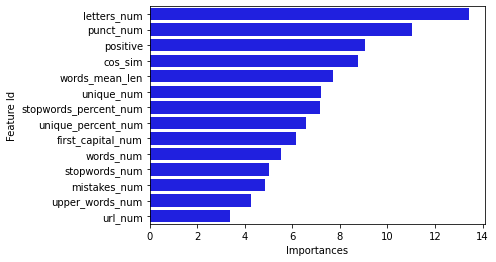

In [65]:
sns.barplot(
    x='Importances', 
    y='Feature Id', 
    data=importance, 
    color='blue')

In [53]:
# save
with open('CatBoost.pkl','wb') as f:
    pickle.dump(model_CatBoost,f)
